# Import Libraries

In [72]:
! pip install openpyxl

In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Import Dataset

In [74]:

# Load the data from the provided Excel file
df = pd.read_csv('E_Commerce_Dataset.csv')


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [76]:
# Remove 'CustomerID' from dataset
del df['CustomerID']

In [77]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [78]:
# Define mappings to consolidate categories
payment_mode_mapping = {
    'CC': 'Credit Card',
    'COD': 'Cash on Delivery',
    'Cash on Delivery': 'Cash on Delivery',
    'Credit Card': 'Credit Card',
    'Debit Card': 'Debit Card',
    'E wallet': 'E wallet',
    'UPI': 'UPI'
}

login_device_mapping = {
    'Computer': 'Computer',
    'Mobile Phone': 'Mobile Phone',
    'Phone': 'Mobile Phone'
}

# Apply the mappings
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].map(payment_mode_mapping)
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].map(login_device_mapping)

In [79]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


In summary, the mean and median in each column are so close from each other. So I decided to filling all the missing values with median, since some feature will make more sense if they had integer values like Complain, CouponUsed, OrderCount, etc. (like there's no such things like "I used coupon 1.75 times" or "User has 0.2 complained")

# Handling Missing Values

In [80]:
total_na = df.isnull().sum().sum()
print(f"Total missing values: {total_na} ({ round((total_na/df.shape[0])*100, 2) }%)")

Total missing values: 1856 (32.97%)


In [81]:
# Verify that there are no more missing values
print(df.isnull().sum())

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [82]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        
# Done. Checking the missing values for the last time
df.isnull().sum()

C:\Users\7106d\AppData\Local\Temp\ipykernel_27060\107156432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\7106d\AppData\Local\Temp\ipykernel_27060\107156432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [83]:
total_na = df.isnull().sum().sum()
print(f"Total missing values: {total_na} ({ round((total_na/df.shape[0])*100, 2) }%)")

Total missing values: 0 (0.0%)


In [84]:
# Remove rows with missing values
df.dropna(inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


# Percentage of Customer Churn

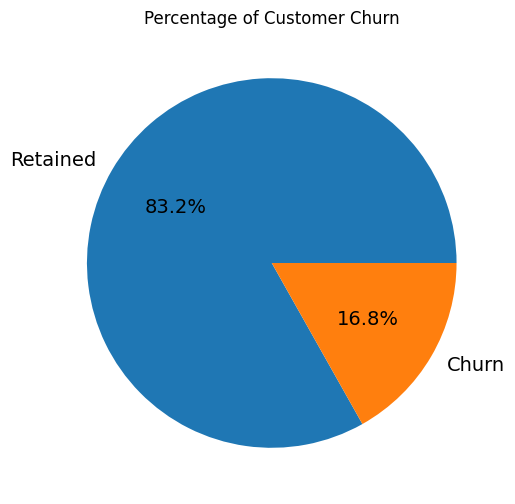

In [85]:
# First, what is the percentage of customer churn
labels = ['Retained','Churn']
counts = df['Churn'].value_counts()
# print(counts)

plt.figure(figsize=(6,6))
plt.title('Percentage of Customer Churn')
plt.pie(counts, autopct='%1.1f%%', labels=labels, textprops={"fontsize":14})
plt.show()

# Customer Churn based on Gender

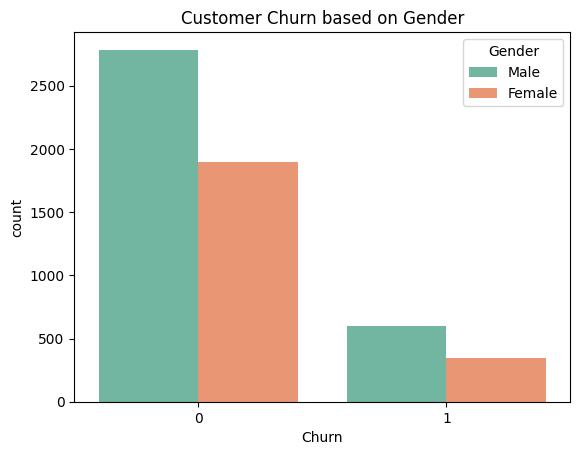

In [86]:
# Customer churn based on gender
sns.countplot(x='Churn', hue='Gender', data=df, palette='Set2')
plt.title('Customer Churn based on Gender')
plt.show()

# Distribution of Order Count of Customers

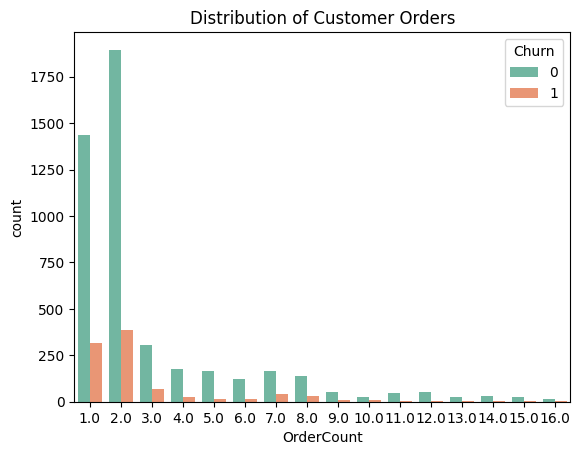

In [87]:
sns.countplot(x=df['OrderCount'], hue=df['Churn'],palette='Set2')
plt.title("Distribution of Customer Orders")
plt.show()

# Customer Preferred Login Device

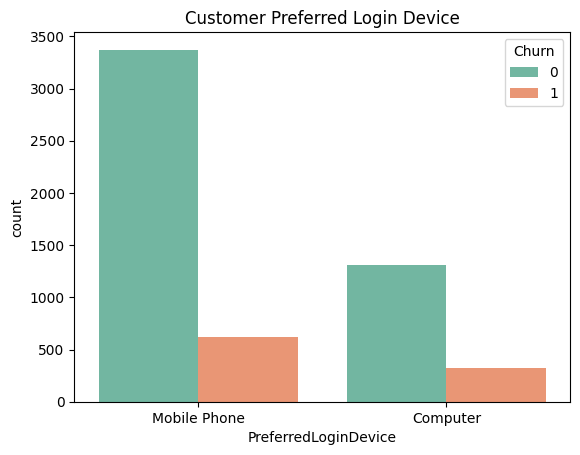

In [88]:
sns.countplot(x=df['PreferredLoginDevice'], hue=df['Churn'],palette='Set2')
plt.title('Customer Preferred Login Device')
plt.show()

# Customer Preferred Payment

C:\Users\7106d\AppData\Local\Temp\ipykernel_27060\3472800790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PreferredPaymentMode', data=df, palette=colors)


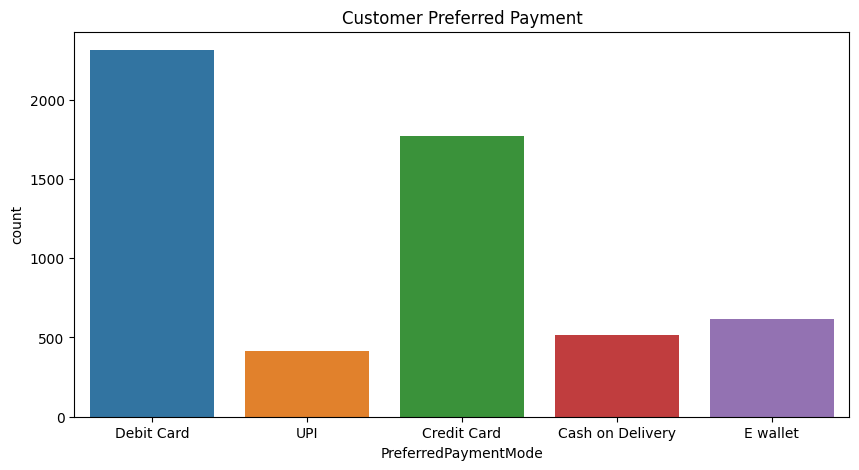

In [89]:

# Define a list of colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Example colors

# Plot customer preferred payment modes with different colors for each bar
plt.figure(figsize=(10, 5))
sns.countplot(x='PreferredPaymentMode', data=df, palette=colors)
plt.title('Customer Preferred Payment')
plt.show()


# Customer Preferred Order Category

C:\Users\7106d\AppData\Local\Temp\ipykernel_27060\2506897337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['PreferedOrderCat'], palette=colors)
C:\Users\7106d\AppData\Local\Temp\ipykernel_27060\2506897337.py:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df['PreferedOrderCat'], palette=colors)


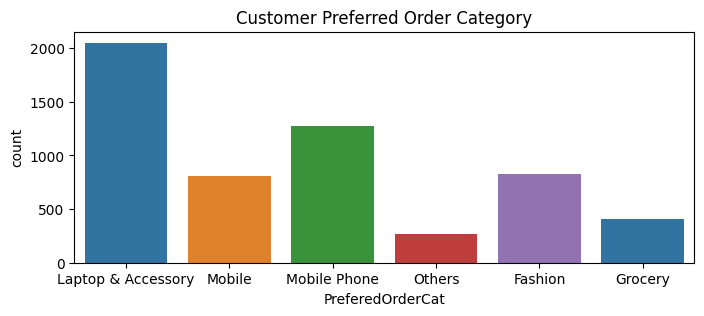

In [90]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] 
plt.figure(figsize=(8,3))
sns.countplot(x=df['PreferedOrderCat'], palette=colors)
plt.title('Customer Preferred Order Category')
plt.show()

# Customer Distance from Warehouse to Home

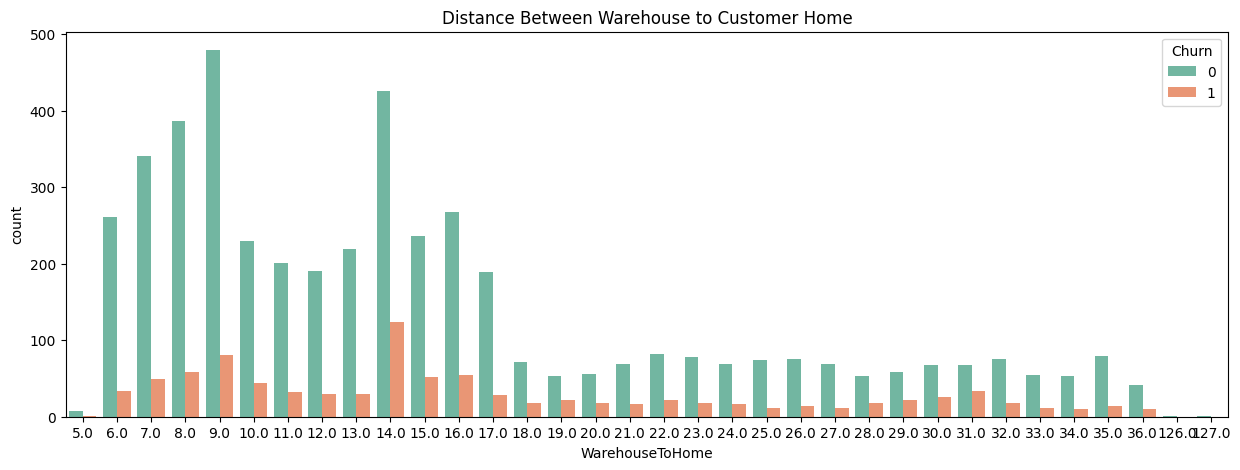

In [91]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['WarehouseToHome'], hue=df['Churn'],palette='Set2')
plt.title('Distance Between Warehouse to Customer Home')
plt.show()

C:\Users\7106d\AppData\Local\Temp\ipykernel_27060\839185981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['CityTier'],palette='Set2')


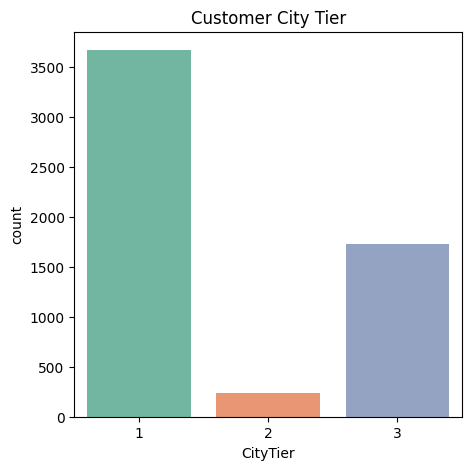

In [92]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['CityTier'],palette='Set2')
plt.title('Customer City Tier')
plt.show()

# Customer Hour Spend On App

C:\Users\7106d\AppData\Local\Temp\ipykernel_27060\3802370932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['HourSpendOnApp'],palette='Set2')


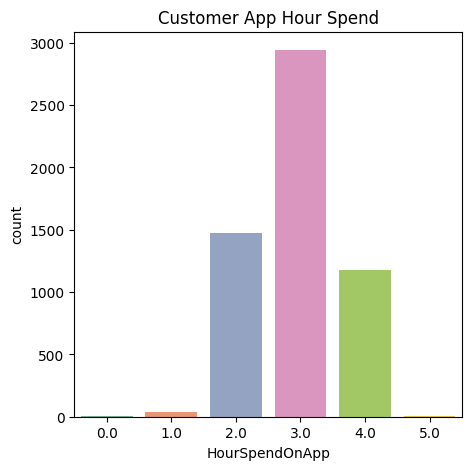

In [93]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['HourSpendOnApp'],palette='Set2')
plt.title('Customer App Hour Spend')
plt.show()

# Customers Satisfaction Score

Average Satisfaction Score: 3.066785079928952


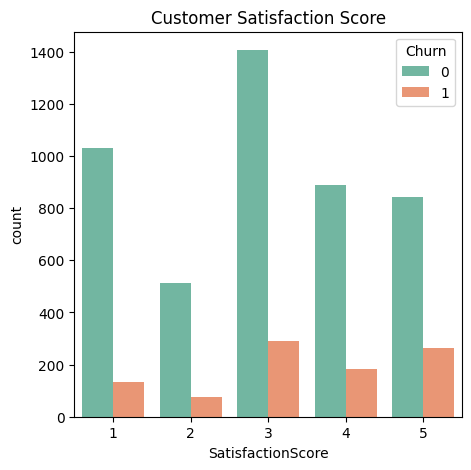

In [94]:
average_score = df['SatisfactionScore'].mean()
print('Average Satisfaction Score:',average_score)

plt.figure(figsize=(5,5))
sns.countplot(x=df['SatisfactionScore'], hue=df['Churn'],palette='Set2')
plt.title('Customer Satisfaction Score')
plt.show()

# Customer Marital Status

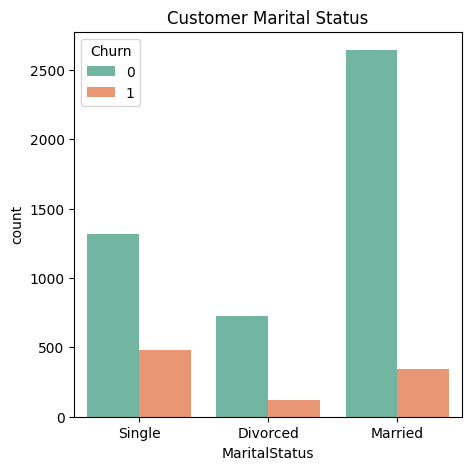

In [95]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['MaritalStatus'], hue=df['Churn'],palette='Set2')
plt.title('Customer Marital Status')
plt.show()

# Customer Complains

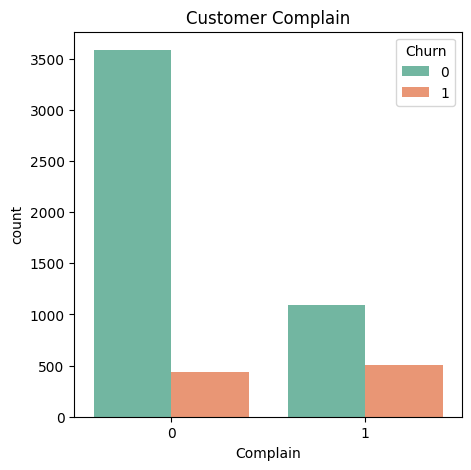

In [96]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Complain'], hue=df['Churn'],palette='Set2')
plt.title('Customer Complain')
plt.show()

# Customer Order

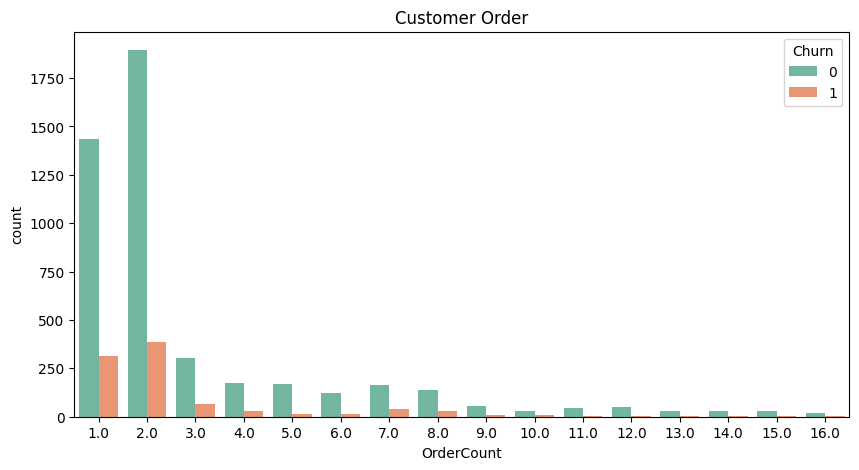

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['OrderCount'], hue=df['Churn'],palette='Set2')
plt.title('Customer Order')
plt.show()

# Customer Used Coupon

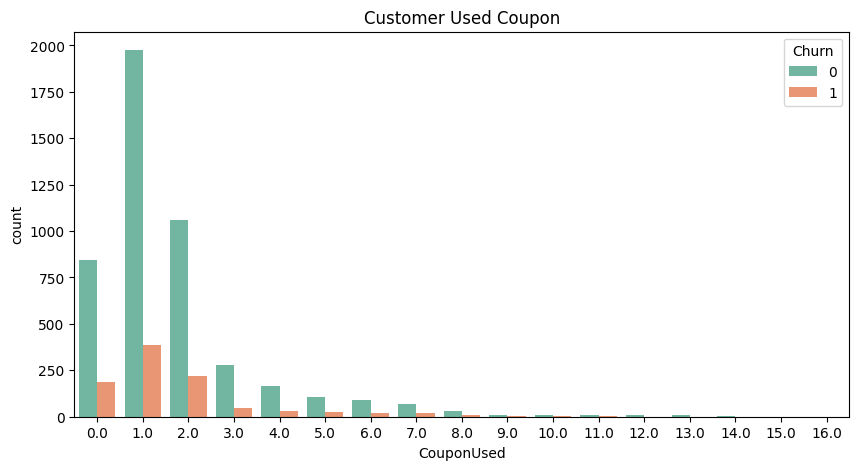

In [98]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['CouponUsed'], hue=df['Churn'],palette='Set2')
plt.title('Customer Used Coupon')
plt.show()

# Customer Day Since Last Order

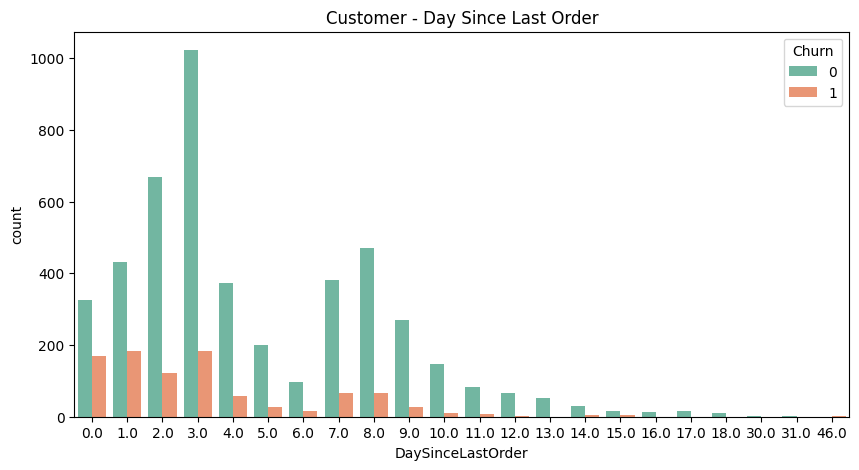

In [99]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['DaySinceLastOrder'], hue=df['Churn'],palette='Set2')
plt.title('Customer - Day Since Last Order')
plt.show()

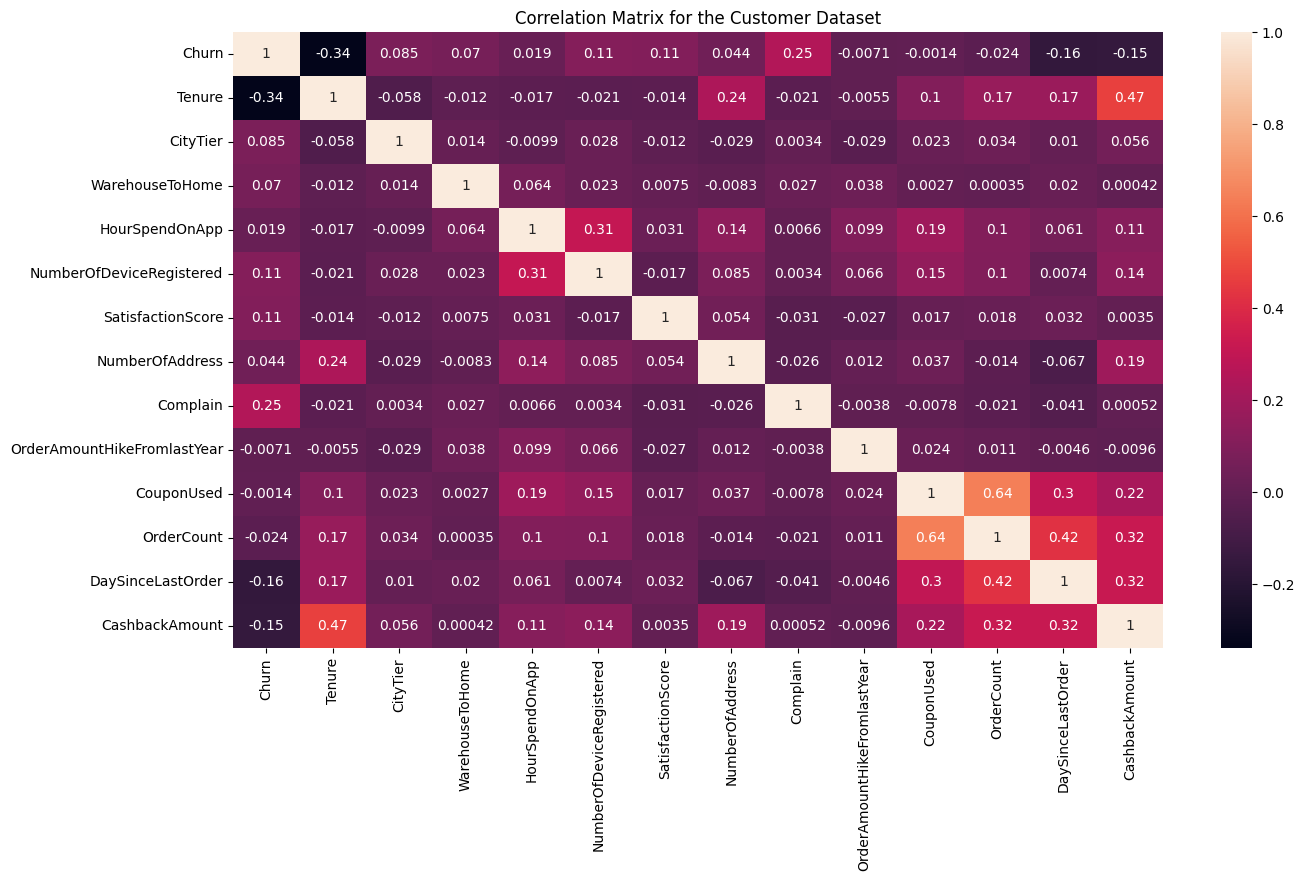

In [100]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

In [101]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Function to get label encoding mappings for categorical columns
def get_label_mappings(df):
    label_mappings = {}
    for column in df.columns:
        if df[column].dtype == 'object':
            le = LabelEncoder()
            le.fit(df[column])
            label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return label_mappings

# Assuming 'df' is your DataFrame
label_mappings = get_label_mappings(df)

# Print label mappings
for column, mapping in label_mappings.items():
    print(f"Column: {column}")
    for value, label in mapping.items():
        print(f"  {value} -> {label}")


Column: PreferredLoginDevice
  Computer -> 0
  Mobile Phone -> 1
Column: PreferredPaymentMode
  Cash on Delivery -> 0
  Credit Card -> 1
  Debit Card -> 2
  E wallet -> 3
  UPI -> 4
Column: Gender
  Female -> 0
  Male -> 1
Column: PreferedOrderCat
  Fashion -> 0
  Grocery -> 1
  Laptop & Accessory -> 2
  Mobile -> 3
  Mobile Phone -> 4
  Others -> 5
Column: MaritalStatus
  Divorced -> 0
  Married -> 1
  Single -> 2


In [102]:
# Create function to convert column with dtype object to integer
def object_to_int(x):
    if x.dtype == 'object':
        x = LabelEncoder().fit_transform(x)
    return x

# Convert column dtype object to int
data = df.apply(lambda x : object_to_int(x))

# Balance the dataset

In [103]:
# balance dataset with oversampling
from sklearn.utils import resample
data_0 = data.loc[data['Churn'] == 0]
data_1 = data.loc[data['Churn'] == 1]

# Count total each churn feature
n_0 = len(data_0)
n_1 = len(data_1)

# Applying oversampling method
data_oversampling = resample(data_1, replace=True, n_samples=n_0, random_state=42)
data_new = pd.concat([data_oversampling, data_0])
data_new = data_new.sample(frac=1)
data_new.reset_index(drop=True, inplace=True)

In [104]:
# Check total of churn data after apply oversampling method
data_new['Churn'].value_counts()

Churn
0    4682
1    4682
Name: count, dtype: int64

# Model

In [105]:
# First we need to the data into 70% training dataset and 30% testing dataset
X = data_new.drop(['Churn'],axis=1)
y = data_new['Churn']

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [106]:
# Display the features used for training
print("Features used for training:", X.columns)


Features used for training: Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


# Logistic Regression

Accuracy Score: 0.7910311165344722 
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1672
           1       0.77      0.81      0.79      1606

    accuracy                           0.79      3278
   macro avg       0.79      0.79      0.79      3278
weighted avg       0.79      0.79      0.79      3278



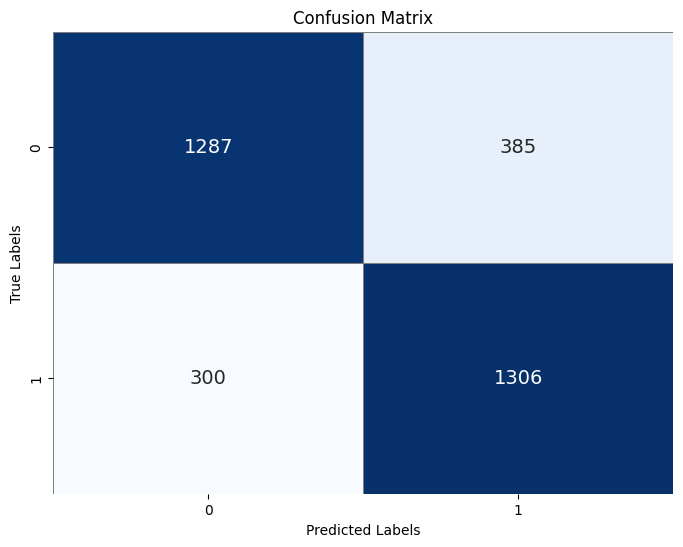

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)
print('Accuracy Score: %s ' % accuracy_score(y_test, logreg_prediction))
print(classification_report(y_test, logreg_prediction))
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, logreg_prediction)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# K-Nearest Neighbor (KNN)

Accuracy Score: 0.7910311165344722 
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1672
           1       0.77      0.81      0.79      1606

    accuracy                           0.79      3278
   macro avg       0.79      0.79      0.79      3278
weighted avg       0.79      0.79      0.79      3278



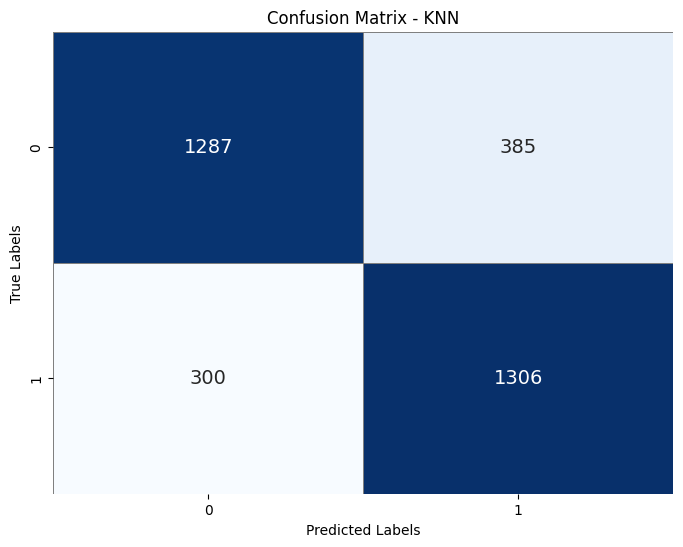

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_prediction = logreg.predict(X_test)
print('Accuracy Score: %s ' % accuracy_score(y_test, knn_prediction))
print(classification_report(y_test, knn_prediction))
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, knn_prediction)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN')
plt.show()

# Support Vector Machine (SVM)

Accuracy Score: 0.7568639414276999
              precision    recall  f1-score   support

           0       0.81      0.69      0.74      1672
           1       0.72      0.83      0.77      1606

    accuracy                           0.76      3278
   macro avg       0.76      0.76      0.76      3278
weighted avg       0.76      0.76      0.76      3278



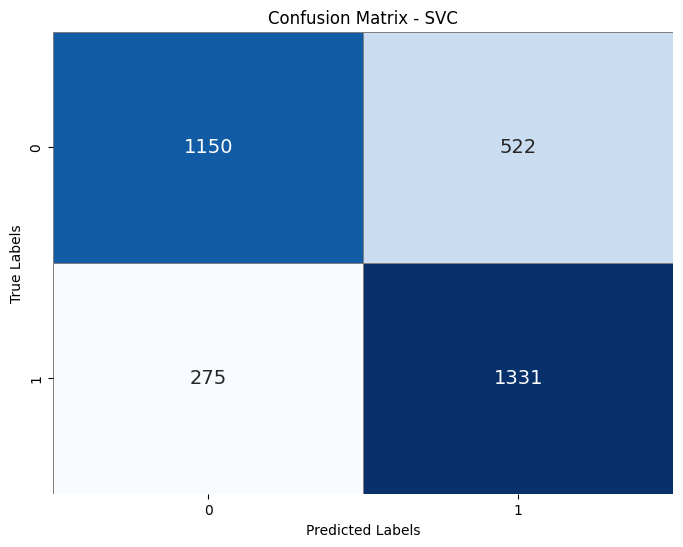

In [109]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
print('Accuracy Score: %s' % accuracy_score(y_test, svc_prediction))
print(classification_report(y_test, svc_prediction))
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, svc_prediction)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVC')
plt.show()

# Random Forest Classifier

Accuracy Score: 0.9902379499694935
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1672
           1       0.98      1.00      0.99      1606

    accuracy                           0.99      3278
   macro avg       0.99      0.99      0.99      3278
weighted avg       0.99      0.99      0.99      3278



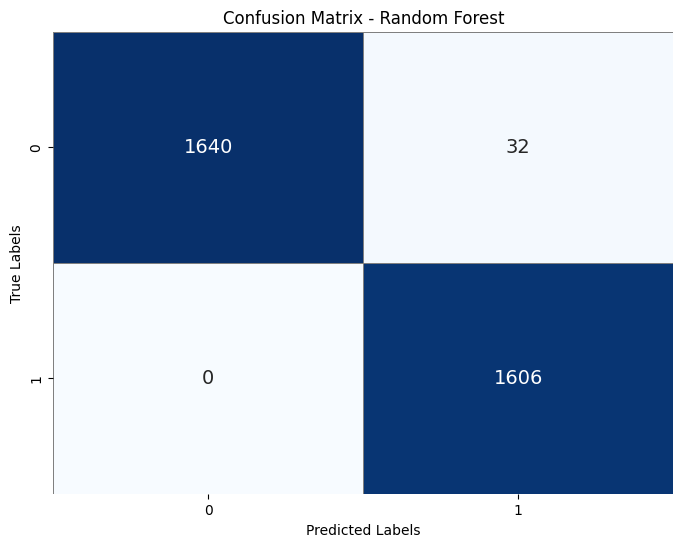

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
rf_prediction = rf.predict(X_test)

# Print the accuracy score
print('Accuracy Score: %s' % accuracy_score(y_test, rf_prediction))

# Print the classification report
print(classification_report(y_test, rf_prediction))
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_prediction)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Accuracy Score: 0.9853569249542404
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1672
           1       0.97      1.00      0.99      1606

    accuracy                           0.99      3278
   macro avg       0.99      0.99      0.99      3278
weighted avg       0.99      0.99      0.99      3278



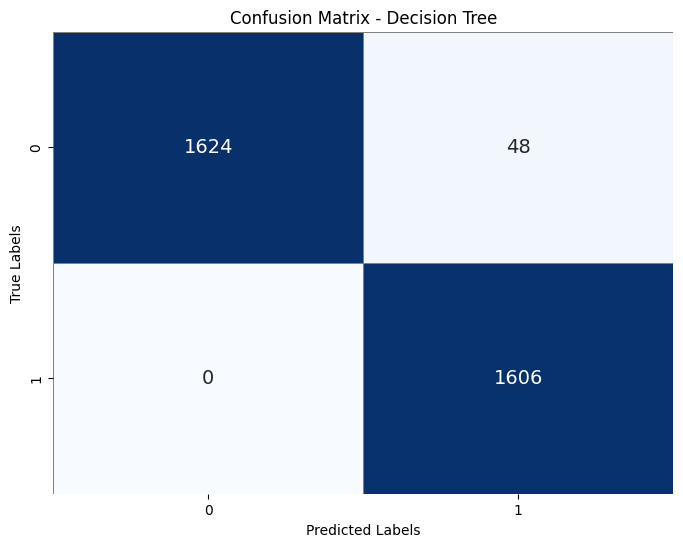

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined and split appropriately

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Predict on test data
dt_prediction = dt.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, dt_prediction)
print('Accuracy Score:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, dt_prediction))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, dt_prediction)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [112]:

# Example test case
test_case = pd.DataFrame([{
    'Tenure': 12.0,
    'PreferredLoginDevice': 2,  # Phone
    'CityTier': 2,
    'WarehouseToHome': 10.0,
    'PreferredPaymentMode': 4,  # Debit Card
    'Gender': 0,  # Female
    'HourSpendOnApp': 2.5,
    'NumberOfDeviceRegistered': 1,
    'PreferedOrderCat': 2,  # Laptop & Accessory
    'SatisfactionScore': 1,
    'MaritalStatus': 2,  # Single
    'NumberOfAddress': 1,
    'Complain': 0,
    'OrderAmountHikeFromlastYear': 5.0,
    'CouponUsed': 2,
    'OrderCount': 15,
    'DaySinceLastOrder': 7,
    'CashbackAmount': 20.50
}])

# Make prediction with the Random Forest model
rf_prediction = rf.predict(test_case)
print(f"Predicted Churn: {rf_prediction[0]}")


Predicted Churn: 0


In [116]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assuming rf is your trained Random Forest model
# Example: rf = RandomForestClassifier().fit(X_train, y_train)

# Save the trained Random Forest model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)

In [114]:
from sklearn.model_selection import train_test_split, cross_val_score
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and evaluate the model using cross-validation
model = RandomForestClassifier(n_estimators=10, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

# Train and evaluate on test data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Cross-validation accuracy scores: [0.99626268 0.99305926 0.99572878 0.99359317 0.99732906]
Mean cross-validation accuracy: 0.9951945893283319
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       949
           1       0.99      1.00      1.00       924

    accuracy                           1.00      1873
   macro avg       1.00      1.00      1.00      1873
weighted avg       1.00      1.00      1.00      1873



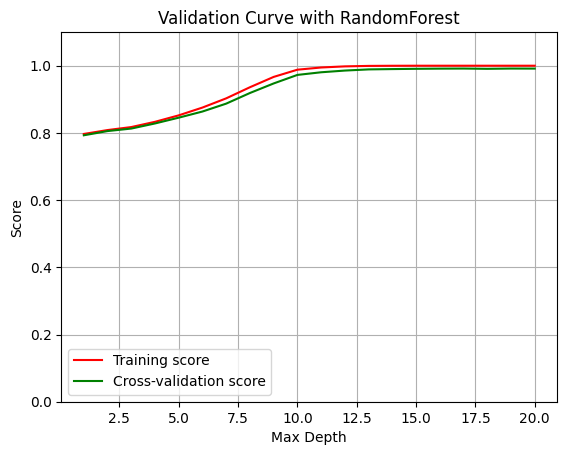

In [115]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 21, 1)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X_train, y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy')

plt.figure()
plt.title("Validation Curve with RandomForest")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score", color="r")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.grid()
plt.show()
